In [1]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto(gpu_options = 
                         tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.8)
)
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import seaborn as sns
#%matplotlib inline

np.random.seed(2)

import tensorflow.keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import History, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, LSTM, RepeatVector, TimeDistributed,LayerNormalization
from tensorflow.keras import backend as K
history = History()
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()


In [3]:
data = pd.read_excel("C:/Users/chilk/Desktop/guy/d.xlsx")

In [4]:
data.head()

,Time (LCLG),Azimuth (deg),Elevation (deg),Range (km),EIRP (dBW),Xmtr Power (dBW),Xmtr Gain (dB),Xmtr EIRP Intensity (dBW/Sterad),Atmos Loss (dB),UrbanTerres Loss (dB),...,Carrier Power at Rcvr Input (dBW),Rcvr Gain (dB),Eb/No (dB),Tatmos (K),TUrbanTerres (K),Train (K),TcloudsFog (K),TtropoScintill (K),TionoFading (K),Unnamed: 30
0,2020-06-24 12:18:20.373000,269.08,5,2092.57,55.414,30,25.4144,44.4223,0.3663,0,...,-87.967,25.4146,41.1308,19.106,0,0.15,0.183,55.441,407.25,NaN
1,2020-06-24 12:18:21,269.082,5.048,2088.4,55.414,30,25.4144,44.4223,0.3633,0,...,-87.935,25.4146,41.1694,18.954,0,0.149,0.181,54.882,407.122,NaN
2,2020-06-24 12:18:22,269.086,5.124,2081.76,55.414,30,25.4144,44.4223,0.3587,0,...,-87.884,25.4146,41.2304,18.716,0,0.147,0.179,54.009,406.912,NaN
3,2020-06-24 12:18:23,269.09,5.201,2075.12,55.414,30,25.4144,44.4223,0.3541,0,...,-87.834,25.4146,41.2907,18.483,0,0.145,0.176,53.158,406.694,NaN
4,2020-06-24 12:18:24,269.094,5.278,2068.48,55.414,30,25.4144,44.4223,0.3496,0,...,-87.784,25.4146,41.3505,18.255,0,0.143,0.174,52.327,406.47,NaN


In [6]:
df = pd.concat([data.iloc[:590,1:9] , data.iloc[597:1180,1:9], data.iloc[1187:1690,1:9], data.iloc[1698:2190,1:9]])

In [7]:
df = pd.DataFrame(min_max_scaler.fit_transform(df))
df.tail()

,0,1,2,3,4,5,6,7
2163,0.257909,0.004742,0.977425,0.0,0.0,0.0,0.0,0.926506
2164,0.257586,0.003957,0.980942,0.0,0.0,0.0,0.0,0.937349
2165,0.257264,0.003173,0.984463,0.0,0.0,0.0,0.0,0.948494
2166,0.256944,0.002401,0.987988,0.0,0.0,0.0,0.0,0.959940
2167,0.256627,0.001629,0.991518,0.0,0.0,0.0,0.0,0.971386


In [9]:
lb =pd.concat([data.iloc[:590,10:12] , data.iloc[597:1180,10:12], data.iloc[1187:1690,10:12], data.iloc[1698:2190,10:12]])

In [10]:
lb = pd.DataFrame(min_max_scaler.fit_transform(lb))
lb.shape

(2168, 2)

In [12]:
df = np.asarray(df)
lb = np.asarray(lb)

In [13]:
x_train = df[:1950]
x_train = x_train.reshape(x_train.shape[0], 8)
x_test = df[1950:]
x_test = x_test.reshape(x_test.shape[0], 8)

In [14]:
y_train = lb[:1950]
y_test = lb[1950:]
print(y_train.shape)
print(y_test.shape)


(1950, 2)
(218, 2)


In [15]:
y_train = y_train.reshape(x_train.shape[0], 2)
y_test = y_test.reshape(x_test.shape[0], 2)

In [16]:
y_train.shape


(1950, 2)

In [17]:
x_train=np.asarray(x_train).astype(np.float32)
x_test=np.asarray(x_test).astype(np.float32)
y_train=np.asarray(y_train).astype(np.float32)
y_test=np.asarray(y_test).astype(np.float32)

In [75]:
model = Sequential()
model.add(Dense(1000, input_shape=(8,),activation='relu'))
model.add(Dense(100 ,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10 ,activation='relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 1000)              9000      
_________________________________________________________________
dense_37 (Dense)             (None, 100)               100100    
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 22        
Total params: 110,132
Trainable params: 110,132
Non-trainable params: 0
_________________________________________________________________


x_train = x_train.reshape(-1, 1, 8)
x_test  = x_test.reshape(-1, 1, 8)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(1, 8)))
model.add(Dense(1))

In [76]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,verbose=1,
                              patience=5, min_lr=0.00001)

In [77]:
epochs = 10
batch_size = 1

In [78]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['CategoricalAccuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=True, validation_split=.1,callbacks=[reduce_lr])
loss, accuracy  = model.evaluate(x_test, y_test, verbose=True)

Train on 1755 samples, validate on 195 samples
Epoch 1/10
1755/1755 [==============================] - 4s 2ms/sample - loss: 0.6931 - CategoricalAccuracy: 0.6484 - val_loss: 0.6931 - val_CategoricalAccuracy: 0.8513
Epoch 2/10
1755/1755 [==============================] - 3s 2ms/sample - loss: 0.6930 - CategoricalAccuracy: 0.7595 - val_loss: 0.6930 - val_CategoricalAccuracy: 0.9026
Epoch 3/10
1755/1755 [==============================] - 3s 2ms/sample - loss: 0.6930 - CategoricalAccuracy: 0.7698 - val_loss: 0.6930 - val_CategoricalAccuracy: 0.9641
Epoch 4/10
1755/1755 [==============================] - 3s 2ms/sample - loss: 0.6930 - CategoricalAccuracy: 0.7618 - val_loss: 0.6931 - val_CategoricalAccuracy: 0.9846
Epoch 5/10
1755/1755 [==============================] - 3s 2ms/sample - loss: 0.6929 - CategoricalAccuracy: 0.7721 - val_loss: 0.6931 - val_CategoricalAccuracy: 0.9538
Epoch 6/10
1739/1755 [============================>.] - ETA: 0s - loss: 0.6929 - CategoricalAccuracy: 0.7654
Epoc

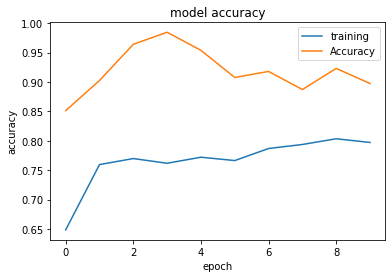

In [79]:
plt.plot(history.history['CategoricalAccuracy'])
plt.plot(history.history['val_CategoricalAccuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'Accuracy'], loc='best')
plt.show()

In [80]:
yhat = model.predict(x_test, verbose=0)